In [15]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 


In [16]:
import warnings
warnings.filterwarnings('ignore')

In [17]:
''' Aim - To do the BIo Informatics Hackathon 

Generate Correct Protein Sequences (based on limited given examples )
'''

' Aim - To do the BIo Informatics Hackathon \n\nGenerate Correct Protein Sequences (based on limited given examples )\n'

In [18]:
data  = pd.read_csv('/kaggle/input/proteins/proteins.csv')

In [45]:
data.head()

,Unnamed: 0,EC_number,uniprot_ids,name,function,sequence,Mis_seq
1000,1000,ID 1.1.1.25,B2B223,ARO1_PODAN,shikimate dehydrogenase (NADP(+)).,MTSSTGSGPTRISILGKDDIIVDHGIWLDFVTHDLLQNIPSSTYVL...,MTSSTGSGPTRISILGKDDIIVDHGIWLDFVTHDLLQNIPSSTYVL...
1001,1001,ID 1.1.1.25,B6JVD0,ARO1_SCHJY,shikimate dehydrogenase (NADP(+)).,MSQDTDVVSVPILGKEAVFVGFNLERRVCDFLIENAKSSAYVIVTD...,MSQDTDVVSVPILGKEAVFVGFNLERRVCDFLIENAKSSAYVIVTD...
1002,1002,ID 1.1.1.25,Q9P7R0,ARO1_SCHPO,shikimate dehydrogenase (NADP(+)).,MSNESNIITVPILGKDTVRVGFGIHQYICTEILENFKSSTYVVITD...,MSNESNIITVPILGKDTVRVGFGIHQYICTEILENFKSSTYVVITD...
1003,1003,ID 1.1.1.25,A7F7H0,ARO1_SCLS1,shikimate dehydrogenase (NADP(+)).,MGSTTFENPTRIEILGKEDIIVDFDIWRNFVAEDLLSDLPSSTYVL...,MGSTTFENPTRIEILGKEDIIVDFDIWRNFVAEDLLSDLPSSTYVL...
1004,1004,ID 1.1.1.25,Q5XNP0,ARO1_SCLSC,shikimate dehydrogenase (NADP(+)).,MGSTTFENPTRIEILGKEDIIVDFDIWRNFVAEDLLSDLPSSTYVL...,MGSTTFENPTRIEILGKEDIIVDFDIWRNFVAEDLLSDLPSSTYVL...


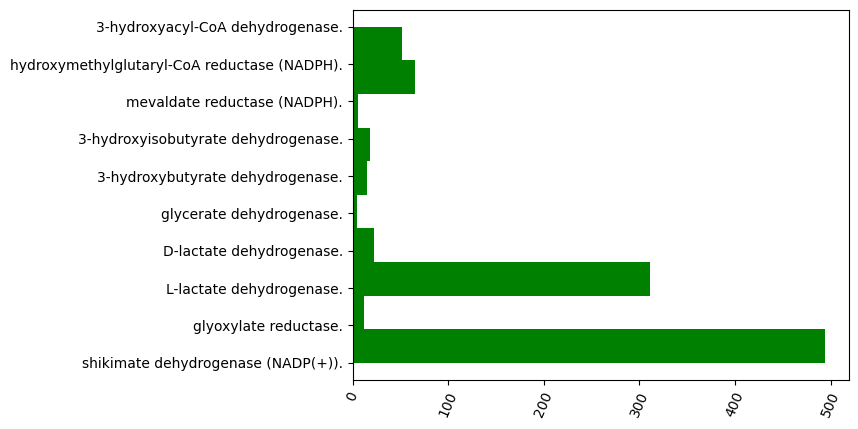

In [67]:
# Checking Sample distribution 


df1 = data[:1000]
plt.hist(df1['function'] ,  orientation='horizontal' , color = 'green')
plt.xticks(rotation =67)
plt.show()

In [20]:
start = 0
end = 1000

for i in range(start ,end) :
    seq = data.iloc[i][5]
    if seq.find('B'or 'J' or 'O' or 'U' or 'X' or 'Z') :
        data.drop(i  , axis= 0 ,  inplace = True) 

In [21]:
data.shape

(88560, 6)

In [22]:
import random 

def replace_chars_with_blank(input_string, n):
   
    char_list = list(input_string)
    indices_to_replace = random.sample(range(len(char_list)), n)
    
    for idx in indices_to_replace:
        char_list[idx] = ' '
    
    output_string = ''.join(char_list) # remove the chars from char_list (string as list) and replace with ' '
    
    return output_string



In [23]:
new_s = []

for i in range(data.shape[0]) :
    s = data.iloc[i][5]
    s1 = replace_chars_with_blank(s , 2) 
    new_s.append(s1)
    
    

In [24]:
data['Mis_seq'] = new_s 

In [25]:
data.head()

,Unnamed: 0,EC_number,uniprot_ids,name,function,sequence,Mis_seq
1000,1000,ID 1.1.1.25,B2B223,ARO1_PODAN,shikimate dehydrogenase (NADP(+)).,MTSSTGSGPTRISILGKDDIIVDHGIWLDFVTHDLLQNIPSSTYVL...,MTSSTGSGPTRISILGKDDIIVDHGIWLDFVTHDLLQNIPSSTYVL...
1001,1001,ID 1.1.1.25,B6JVD0,ARO1_SCHJY,shikimate dehydrogenase (NADP(+)).,MSQDTDVVSVPILGKEAVFVGFNLERRVCDFLIENAKSSAYVIVTD...,MSQDTDVVSVPILGKEAVFVGFNLERRVCDFLIENAKSSAYVIVTD...
1002,1002,ID 1.1.1.25,Q9P7R0,ARO1_SCHPO,shikimate dehydrogenase (NADP(+)).,MSNESNIITVPILGKDTVRVGFGIHQYICTEILENFKSSTYVVITD...,MSNESNIITVPILGKDTVRVGFGIHQYICTEILENFKSSTYVVITD...
1003,1003,ID 1.1.1.25,A7F7H0,ARO1_SCLS1,shikimate dehydrogenase (NADP(+)).,MGSTTFENPTRIEILGKEDIIVDFDIWRNFVAEDLLSDLPSSTYVL...,MGSTTFENPTRIEILGKEDIIVDFDIWRNFVAEDLLSDLPSSTYVL...
1004,1004,ID 1.1.1.25,Q5XNP0,ARO1_SCLSC,shikimate dehydrogenase (NADP(+)).,MGSTTFENPTRIEILGKEDIIVDFDIWRNFVAEDLLSDLPSSTYVL...,MGSTTFENPTRIEILGKEDIIVDFDIWRNFVAEDLLSDLPSSTYVL...


In [26]:
import tensorflow as tf 
from tensorflow import keras

In [27]:

from keras.preprocessing.sequence import pad_sequences 

from keras.layers import Embedding , GRU , Dense 

inputs = data['Mis_seq'][:1000].tolist()  # List of inp strings with blanked seq 
outputs = data['sequence'][:1000].tolist()  # List of correct seq 

# COncatenate thr inp and out string and sort them 
all_characters = ''.join(inputs + outputs)
char_set = sorted(set(all_characters)) # get all unique chars in string 

char_2_index = {char: i for i, char in enumerate(char_set)}
index_2_char = {i: char for i, char in enumerate(char_set)}

def tokenize_sequence(sequence, char_to_index):
    return [char_2_index.get(char, char_2_index[' ']) for char in sequence] 
# char_to_index[''] -> used for blank spaces 

inputs_tokenized = [tokenize_sequence(seq, char_2_index) for seq in inputs]

outputs_tokenized = [tokenize_sequence(seq, char_2_index) for seq in outputs]

# Padding the inp and output 
max_length = max(len(seq) for seq in inputs_tokenized + outputs_tokenized)

inputs_padded = pad_sequences(inputs_tokenized, maxlen=max_length, padding='post')
outputs_padded = pad_sequences(outputs_tokenized, maxlen=max_length, padding='post')

# LSTM model architecture
model = tf.keras.Sequential([
   Embedding(len(char_set), 10 ),
    GRU(64 , return_sequences = True),
    GRU(64, return_sequences=True),
    tf.keras.layers.TimeDistributed(Dense(len(char_set), activation='softmax'))
])


model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


model.fit(inputs_padded, outputs_padded, epochs=35, batch_size= 18, validation_split=0.2)


Epoch 1/35
45/45 ━━━━━━━━━━━━━━━━━━━━ 127s 743ms/step - accuracy: 0.7380 - loss: 1.5654 - val_accuracy: 0.7075 - val_loss: 0.9378
Epoch 2/35
45/45 ━━━━━━━━━━━━━━━━━━━━ 16s 366ms/step - accuracy: 0.8477 - loss: 0.5167 - val_accuracy: 0.8420 - val_loss: 0.6058
Epoch 3/35
45/45 ━━━━━━━━━━━━━━━━━━━━ 17s 369ms/step - accuracy: 0.9490 - loss: 0.2755 - val_accuracy: 0.9793 - val_loss: 0.2144
Epoch 4/35
45/45 ━━━━━━━━━━━━━━━━━━━━ 17s 369ms/step - accuracy: 0.9922 - loss: 0.0946 - val_accuracy: 0.9908 - val_loss: 0.0847
Epoch 5/35
45/45 ━━━━━━━━━━━━━━━━━━━━ 17s 369ms/step - accuracy: 0.9953 - loss: 0.0416 - val_accuracy: 0.9981 - val_loss: 0.0450
Epoch 6/35
45/45 ━━━━━━━━━━━━━━━━━━━━ 17s 367ms/step - accuracy: 0.9984 - loss: 0.0254 - val_accuracy: 0.9985 - val_loss: 0.0283
Epoch 7/35
45/45 ━━━━━━━━━━━━━━━━━━━━ 17s 369ms/step - accuracy: 0.9986 - loss: 0.0176 - val_accuracy: 0.9986 - val_loss: 0.0203
Epoch 8/35
45/45 ━━━━━━━━━━━━━━━━━━━━ 17s 367ms/step - accuracy: 0.9987 - loss: 0.0135 - val_acc

In [28]:
def predict_sequence(model, input_sequence, char_set, max_length):
    input_sequence_tokenized = [char_2_index[char] if char in char_2_index else char_2_index[' '] for char in input_sequence]
    input_sequence_padded = pad_sequences([input_sequence_tokenized], maxlen=max_length, padding='post')
    
    # predict the blank spaces in sequences 
    predictions = model.predict(input_sequence_padded)
    # get the index of the predicted characters
    predicted_indices = np.argmax(predictions, axis=-1)
    
    # Convert indices back to characters
    predicted_chars = [index_2_char[idx] for idx in predicted_indices[0]]
    seq = '' 
    j= 0 
    for char in input_sequence :
        if char==' ' :
            seq +=predicted_chars[j]
            j+=1
        else :
            seq += char 

    
    return seq




NameError: name 'val_inputs' is not defined

In [29]:
input_seq = replace_chars_with_blank("MMBNNB MM" , 2) 

print(predict_sequence(model, input_seq, char_set, max_length))

1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step
MMBNNBVM 


In [30]:
# Approach 2 

# See the mosr prevalent apirs of amino acids in the chain and use them to find most
# predicted sequences 

start  = 0 
end = 1000
pairs_prev = []

for i in range(start , end ) :
    seq = data.iloc[i][5]
    dict_freq = {}
    
    for j in range(len(seq)-1) :
        if seq[j]+seq[j+1] in dict_freq :
            dict_freq[seq[j] + seq[j+1]]+=1 
        else :
            dict_freq[seq[j]+seq[j+1]] =1 
    max_pair = max(dict_freq , key = dict_freq.get)
    pairs_prev.append(max_pair)
    


In [43]:
end1 = 1000
df = data[:end1]
df['pairs_seq'] = pairs_prev

In [36]:
df.head()

,Unnamed: 0,EC_number,uniprot_ids,name,function,sequence,Mis_seq,pairs_seq
1000,1000,ID 1.1.1.25,B2B223,ARO1_PODAN,shikimate dehydrogenase (NADP(+)).,MTSSTGSGPTRISILGKDDIIVDHGIWLDFVTHDLLQNIPSSTYVL...,MTSSTGSGPTRISILGKDDIIVDHGIWLDFVTHDLLQNIPSSTYVL...,VL
1001,1001,ID 1.1.1.25,B6JVD0,ARO1_SCHJY,shikimate dehydrogenase (NADP(+)).,MSQDTDVVSVPILGKEAVFVGFNLERRVCDFLIENAKSSAYVIVTD...,MSQDTDVVSVPILGKEAVFVGFNLERRVCDFLIENAKSSAYVIVTD...,AA
1002,1002,ID 1.1.1.25,Q9P7R0,ARO1_SCHPO,shikimate dehydrogenase (NADP(+)).,MSNESNIITVPILGKDTVRVGFGIHQYICTEILENFKSSTYVVITD...,MSNESNIITVPILGKDTVRVGFGIHQYICTEILENFKSSTYVVITD...,IL
1003,1003,ID 1.1.1.25,A7F7H0,ARO1_SCLS1,shikimate dehydrogenase (NADP(+)).,MGSTTFENPTRIEILGKEDIIVDFDIWRNFVAEDLLSDLPSSTYVL...,MGSTTFENPTRIEILGKEDIIVDFDIWRNFVAEDLLSDLPSSTYVL...,AA
1004,1004,ID 1.1.1.25,Q5XNP0,ARO1_SCLSC,shikimate dehydrogenase (NADP(+)).,MGSTTFENPTRIEILGKEDIIVDFDIWRNFVAEDLLSDLPSSTYVL...,MGSTTFENPTRIEILGKEDIIVDFDIWRNFVAEDLLSDLPSSTYVL...,AA


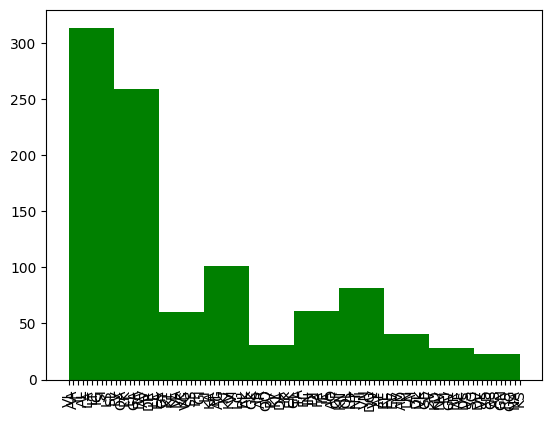

In [65]:

plt.hist(df['pairs_seq'] ,  orientation='vertical' , color = 'green')
plt.xticks(rotation =90)
plt.show()

In [37]:
# combine random letters of pairs of amino acids most occuring together 

# Now train a ML model with input as prevalent pair and output the Sequence from which it was picked 

# Define your dataset

inputs = df['pairs_seq'].tolist()  # List of input strings with misspelled sequences
outputs = df['sequence'].tolist()  # List of corresponding correct sequences

# Concatenate all sequences to extract unique characters
all_characters = ''.join(inputs + outputs)

# Extract unique characters
char_set = sorted(set(all_characters))

# Create character to index and index to character dictionaries
char_to_index = {char: i for i, char in enumerate(char_set)}
index_to_char = {i: char for i, char in enumerate(char_set)}

def tokenize_sequence(sequence, char_to_index):
    return [char_2_index[char] for char in sequence] # Use ' ' index for missing characters


inputs_tokenized = [tokenize_sequence(seq, char_2_index) for seq in inputs]
outputs_tokenized = [tokenize_sequence(seq, char_2_index) for seq in outputs]

# Pad sequences to the same length
max_length = max(len(seq) for seq in inputs_tokenized + outputs_tokenized)
inputs_padded = pad_sequences(inputs_tokenized, maxlen=max_length, padding='post')
outputs_padded = pad_sequences(outputs_tokenized, maxlen=max_length, padding='post')

# Define model architecture
model_1 = tf.keras.Sequential([
    Embedding(len(char_set), 8 ),
    GRU(64 , return_sequences= True) , 
    GRU(32, return_sequences=True),
    tf.keras.layers.TimeDistributed(Dense(100, activation='softmax'))
])

# Compile the model
model_1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model_1.fit(inputs_padded, outputs_padded, epochs= 35, batch_size= 12, validation_split=0.2)



Epoch 1/35
67/67 ━━━━━━━━━━━━━━━━━━━━ 132s 558ms/step - accuracy: 0.6709 - loss: 6.2178 - val_accuracy: 0.6741 - val_loss: 3.1038
Epoch 2/35
67/67 ━━━━━━━━━━━━━━━━━━━━ 21s 310ms/step - accuracy: 0.8072 - loss: 2.2603 - val_accuracy: 0.6741 - val_loss: 1.8422
Epoch 3/35
67/67 ━━━━━━━━━━━━━━━━━━━━ 21s 309ms/step - accuracy: 0.8118 - loss: 1.1942 - val_accuracy: 0.6741 - val_loss: 1.7038
Epoch 4/35
67/67 ━━━━━━━━━━━━━━━━━━━━ 21s 309ms/step - accuracy: 0.8097 - loss: 1.0996 - val_accuracy: 0.6741 - val_loss: 1.6674
Epoch 5/35
67/67 ━━━━━━━━━━━━━━━━━━━━ 21s 310ms/step - accuracy: 0.8143 - loss: 1.0512 - val_accuracy: 0.6741 - val_loss: 1.6499
Epoch 6/35
67/67 ━━━━━━━━━━━━━━━━━━━━ 21s 307ms/step - accuracy: 0.8111 - loss: 1.0513 - val_accuracy: 0.6741 - val_loss: 1.6405
Epoch 7/35
67/67 ━━━━━━━━━━━━━━━━━━━━ 21s 308ms/step - accuracy: 0.8119 - loss: 1.0257 - val_accuracy: 0.6741 - val_loss: 1.5895
Epoch 8/35
67/67 ━━━━━━━━━━━━━━━━━━━━ 21s 309ms/step - accuracy: 0.8135 - loss: 0.9598 - val_acc

In [38]:
def predict_sequence_from_pair(model, input_sequence, char_set, max_length):
   
    input_sequence_tokenized = [char_2_index[char] for char in input_sequence] 
    input_sequence_padded = pad_sequences([input_sequence_tokenized], maxlen=max_length, padding='post')
    
    predictions = model_1.predict(input_sequence_padded)
    
    # Get the index of the predicted characters
    predicted_indices = np.argmax(predictions, axis=-1)
    
    # Convert indices back to characters
    predicted_chars = [index_2_char[idx] for idx in predicted_indices[0]]
    
    # Join the characters to form the predicted sequence
    predicted_sequence = ''.join(predicted_chars)
    
    return predicted_sequence



In [39]:
predict_sequence_from_pair(model_1 , "MM" , char_set , max_length)

1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step


'MMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAALLLLLLLLLLLLLLLLLLLLLLLLLLLLL                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [41]:
max_length

1715